## Artificial Neural Network

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Import our dataset for the lung cancer survey in our notebook and load the table
data = pd.read_csv("dataset.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
# Remove unwanted columns from our dataset
data = data.drop(["GENDER", "AGE"], axis=1)
data.head()

,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [4]:
# Divide the dataset into predictors and target variable

# Predictors
X = data.drop(["DIAGNOSIS"], axis=1)

# Target variable
y = data["DIAGNOSIS"] 

## Divide data into training and testing parts

In [5]:
# In this case we will be testing on 30% of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Training the model

In [6]:
input_dim = len(X_train.columns)

In [84]:
neurons = 128
epochs = 100
model = Sequential()

In [85]:
model.add(Dense(neurons, input_dim=input_dim, activation="relu"))

# Add hidden layers
model.add(Dense(64, activation="relu"))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [86]:
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=0.33)
predictions = model.predict(X_test)

Epoch 1/100
5/5 [==============================] - 1s 32ms/step - loss: 0.5796 - accuracy: 0.8056 - val_loss: 0.4497 - val_accuracy: 0.9028
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.8264 - val_loss: 0.3413 - val_accuracy: 0.9028
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.8264 - val_loss: 0.2863 - val_accuracy: 0.9028
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3661 - accuracy: 0.8264 - val_loss: 0.2647 - val_accuracy: 0.9028
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3600 - accuracy: 0.8264 - val_loss: 0.2568 - val_accuracy: 0.9028
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.3530 - accuracy: 0.8264 - val_loss: 0.2529 - val_accuracy: 0.9028
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3415 - accuracy: 0.8264 - val_loss: 0.2508 - val_accuracy: 0.9028
Epoch 8/100
5/5 [=========

In [87]:
predictions = (predictions > 0.5)*1

In [88]:
output = pd.DataFrame({"DIAGNOSIS":predictions.flatten()})
output.to_csv("predict.csv", index = False)

In [89]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.12508121132850647, 0.9462365508079529]


In [90]:
score = accuracy_score(y_test, predictions)
score

0.946236559139785

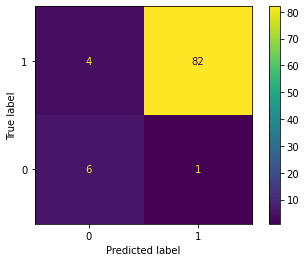

In [91]:
cfm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

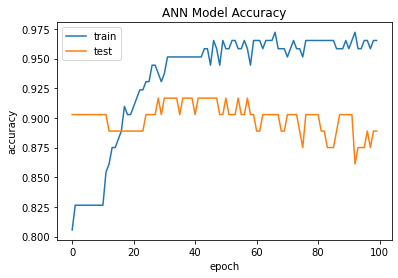

In [92]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("ANN Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

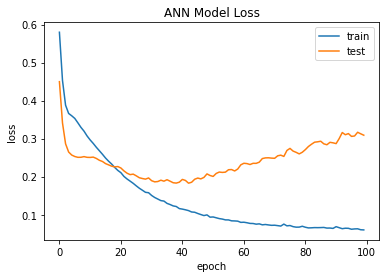

In [93]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("ANN Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()